# Examples of ways to make boring plots more exciting

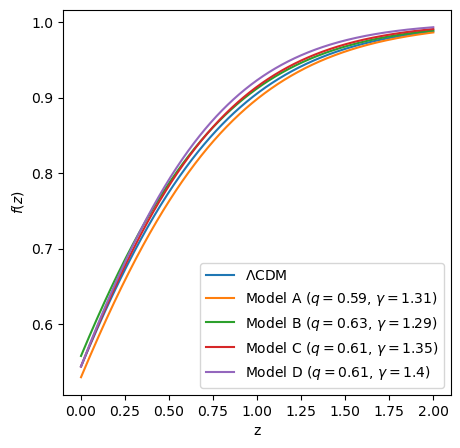

In [11]:
from numpy import *
import matplotlib.pyplot as plt

plt.style.use('default')

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()

z = linspace(0,2,1000)
model = lambda a,gamma : tanh(a*(1+z)**gamma)
ax.plot(z,model(0.61,1.3),label=r'$\Lambda$CDM')
ax.plot(z,model(0.59,1.31),label=r'Model A ($q = 0.59$, $\gamma = 1.31$)')
ax.plot(z,model(0.63,1.29),label=r'Model B ($q = 0.63$, $\gamma = 1.29$)')
ax.plot(z,model(0.61,1.35),label=r'Model C ($q = 0.61$, $\gamma = 1.35$)')
ax.plot(z,model(0.61,1.4),label=r'Model D ($q = 0.61$, $\gamma = 1.4$)')

plt.xlabel('z')
plt.ylabel('$f(z)$')

plt.legend()

plt.savefig('../plots/BoringPlot1_Bad.pdf',transparent=False,bbox_inches='tight')

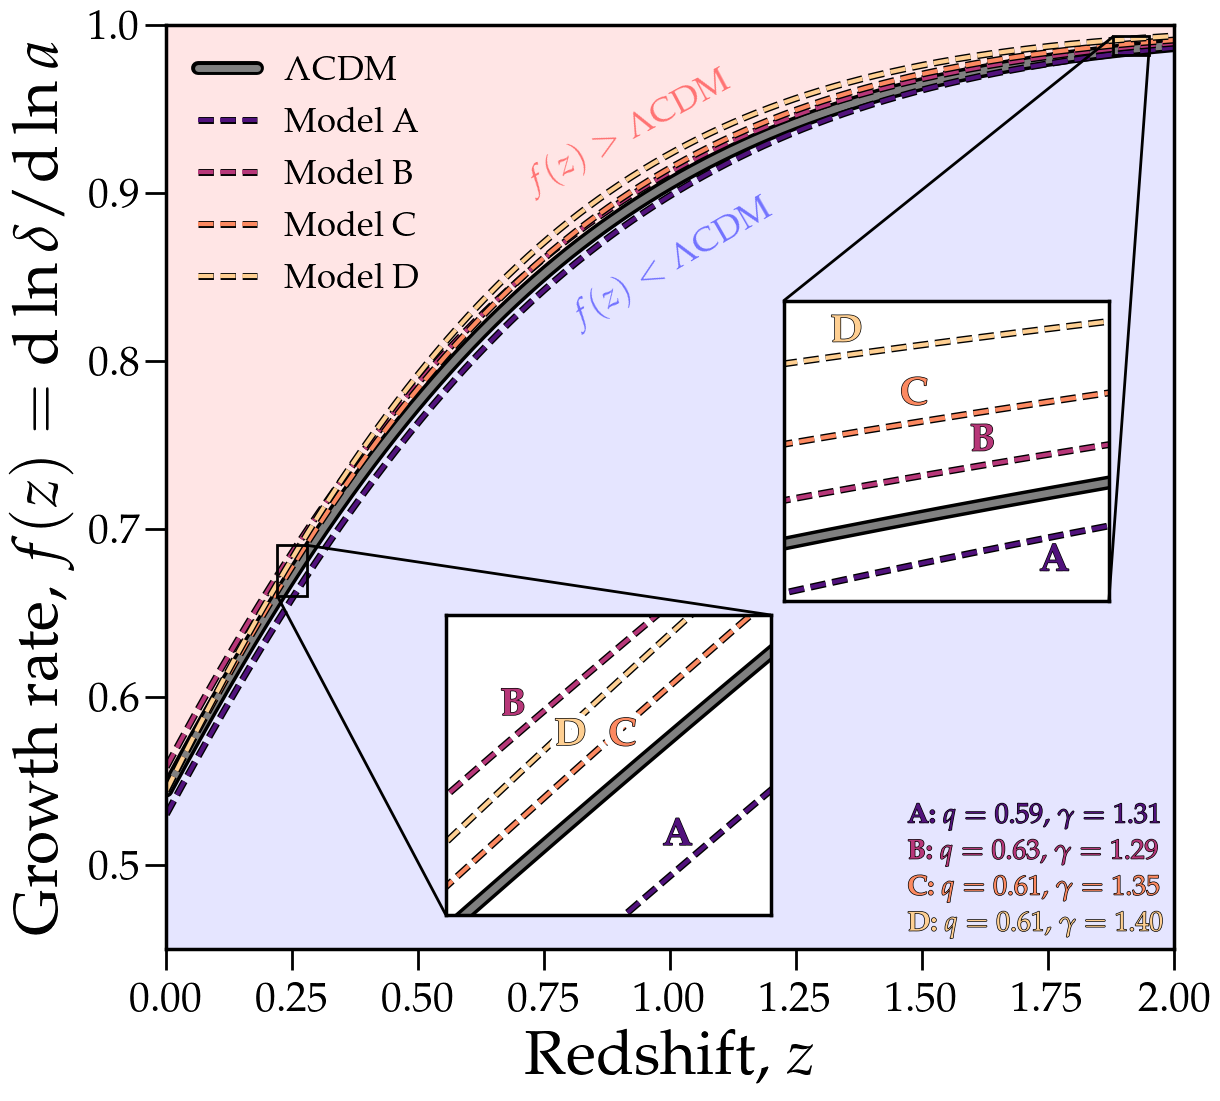

In [22]:
import matplotlib.patheffects as pe
import matplotlib.cm as cm

plt.style.use('sty.mplstyle')

cols = cm.magma([0.25,0.5,0.75,0.9])


def PlotLines(ax):
    z = linspace(0,2,1000)
    model = lambda a,gamma : tanh(a*(1+z)**gamma)
    ax.plot(z,model(0.61,1.3),lw=5,color='gray',path_effects=[pe.Stroke(linewidth=10, foreground='k'), pe.Normal()],label=r'$\Lambda$CDM')
    ax.plot(z,model(0.59,1.31),linestyle='--',color=cols[0],path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()],label=r'Model A')
    ax.plot(z,model(0.63,1.29),linestyle='--',color=cols[1],path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()],label=r'Model B')
    ax.plot(z,model(0.61,1.35),linestyle='--',color=cols[2],path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()],label=r'Model C')
    ax.plot(z,model(0.61,1.4),linestyle='--',color=cols[3],path_effects=[pe.Stroke(linewidth=5, foreground='k'), pe.Normal()],label=r'Model D')


fig = plt.figure()
ax = fig.add_subplot()
PlotLines(ax)

plt.fill_between(z,model(0.61,1.3),y2=1,color='red',alpha=0.1)
plt.fill_between(z,model(0.61,1.3),y2=0,color='blue',alpha=0.1)

plt.legend(loc='upper left',fontsize=25,handlelength=1.7)
ax.set_xlim([0,2])
ax.set_ylim([0.45,1])
ax.set_ylabel(r'Growth rate, $f(z) = {\rm d}\ln \delta /{\rm d}\ln a$',labelpad=10)
ax.set_xlabel(r'Redshift, $z$')
ax.tick_params(which='both',right=False,top=False,tickdir='out')





from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, zoomed_inset_axes

# Inset 1
axins = fig.add_axes([0.6, 0.4, 0.25, 0.25])
PlotLines(axins)
x1, x2, y1, y2 = 1.88, 1.95, 0.982, 0.993
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.tick_params(length=0,labelleft=False, labelbottom=False)
mark_inset(ax, axins, loc1=4, loc2=2, fc="none", ec="0",color='k',alpha=1,lw=2,zorder=10)

axins.text(1.935,0.9831,r'{\bf A}',color=cols[0],path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()])
axins.text(1.92,0.9875,r'{\bf B}',color=cols[1],path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()])
axins.text(1.905,0.9892,r'{\bf C}',color=cols[2],path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()])
axins.text(1.89,0.9915,r'{\bf D}',color=cols[3],path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()])


# Inset 2
axins = fig.add_axes([0.34, 0.138, 0.25, 0.25])
PlotLines(axins)
x1, x2, y1, y2 = 0.22, 0.28, 0.66, 0.69
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.tick_params(length=0,labelleft=False, labelbottom=False)
mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec="0",color='k',alpha=1,lw=2,zorder=10)

axins.text(0.26,0.667,r'{\bf A}',color=cols[0],path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()])
axins.text(0.23,0.68,r'{\bf B}',color=cols[1],path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()])
axins.text(0.25,0.677,r'{\bf C}',color=cols[2],path_effects=[pe.Stroke(linewidth=10, foreground='w'), pe.Normal()])
axins.text(0.25,0.677,r'{\bf C}',color=cols[2],path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()])
axins.text(0.24,0.677,r'{\bf D}',color=cols[3],path_effects=[pe.Stroke(linewidth=10, foreground='w'), pe.Normal()])
axins.text(0.24,0.677,r'{\bf D}',color=cols[3],path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()])


yshift = 0.03
plt.gcf().text(0.695,0.215,r'{\bf A:} $q = 0.59$, $\gamma = 1.31$',color=cols[0],path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],fontsize=20)
plt.gcf().text(0.695,0.215-yshift,r'{\bf B:} $q = 0.63$, $\gamma = 1.29$',color=cols[1],path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],fontsize=20)
plt.gcf().text(0.695,0.215-2*yshift,r'{\bf C:} $q = 0.61$, $\gamma = 1.35$',color=cols[2],path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],fontsize=20)
plt.gcf().text(0.695,0.215-3*yshift,r'{\bf D:} $q = 0.61$, $\gamma = 1.40$',color=cols[3],path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],fontsize=20)

ax.text(0.79,0.82,r'$f(z)<\Lambda$CDM',color='blue',rotation=30,fontsize=25,alpha=0.5)
ax.text(0.7,0.9,r'$f(z)>\Lambda$CDM',color='red',rotation=28,fontsize=25,alpha=0.5)

plt.savefig('../plots/BoringPlot1_Good.pdf',transparent=False,bbox_inches='tight')
plt.savefig('../plots/plots_png/BoringPlot1_Good.png',transparent=False,bbox_inches='tight')

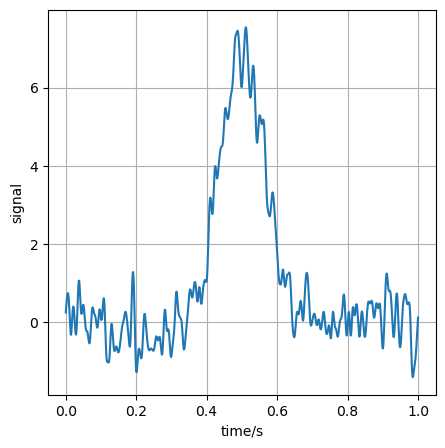

In [13]:
from numpy import random
from numpy.fft import fft, fftshift, ifft, ifftshift

def CorrelatedNoise(t,sigma_f=0.05,sigma_r=1,n=100):

    n = size(t)
    dt = 1/100  # Sampling period
    fs = 1/dt # Sampling frequency
    df = 1/t.max()  # Spacing between frequency components
    f  = linspace(-fs/2,fs/2,n)

    F = fftshift(exp(-pi**2*sigma_f**2*f**2))
    R = random.randn(f.size) + 1j*random.randn(f.size)
    noise = real(2*pi*ifftshift(ifft(F*R))*sigma_r/dt/sqrt(df))
    return noise/std(noise)



plt.style.use('default')

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()

t = linspace(0,1,1000)

signal = 7*exp(-(t-0.5)**2/(2*0.06**2))
noise = CorrelatedNoise(t)
data = signal+noise/2

plt.plot(t,data)
plt.grid()

plt.xlabel('time/s')
plt.ylabel('signal')

plt.savefig('../plots/BoringPlot2_Bad.pdf',transparent=False,bbox_inches='tight')

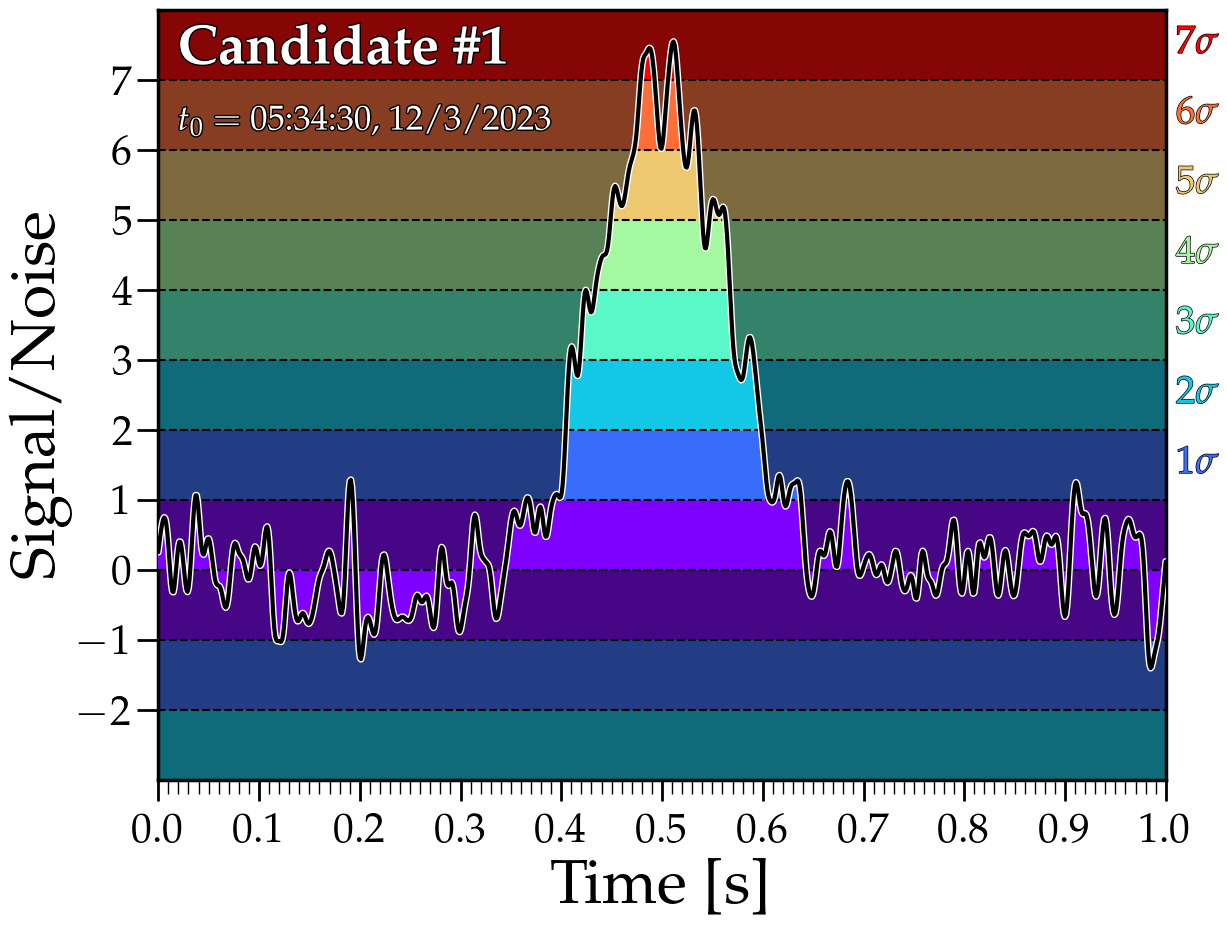

In [23]:
plt.style.use('sty.mplstyle')

fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot()


plt.plot(t,data,'-',color='w',zorder=100,lw=5)
plt.plot(t,data,'-',color='k',zorder=100,lw=3)

cols = cm.rainbow(linspace(0.0,1,8))
tfine = linspace(0,1,10000)
datafine = interp(tfine,t,data)
zo = 5
for level,col in zip(arange(0,9),cols):
    plt.fill_between([0,1],[level,level],y2=level+1,color='k',zorder=0,lw=0,alpha=0.95)
    plt.fill_between([0,1],[-level,-level],y2=-level-1,color='k',zorder=0,lw=0,alpha=0.95)
    plt.fill_between([0,1],[level,level],y2=level+1,color=col,zorder=0,lw=0,alpha=0.5)
    plt.fill_between([0,1],[-level,-level],y2=-level-1,color=col,zorder=0,lw=0,alpha=0.5)
    plt.plot([0,1],[level,level],'--',color='k',zorder=10,lw=1.5)
    plt.plot([0,1],[-level,-level],'--',color='k',zorder=10,lw=1.5)

    data1 = datafine*1
    data1[data1<level] = nan
    plt.fill_between(tfine,data1,y2=ones_like(tfine)*level,color=col,zorder=zo-1)

    
    data1 = datafine*1
    data1[data1>-level] = nan
    plt.fill_between(tfine,data1,y2=-ones_like(tfine)*level,color=col,zorder=zo-1)

    if level>0:
        plt.text(1.01,level+0.5,'$ %.f \sigma$'%(level),color=col,path_effects=[pe.Stroke(linewidth=1, foreground='k'), pe.Normal()],ha='left',va='center',zorder=10)


plt.yticks(arange(-2,8))
plt.ylim([-3,8])

#plt.grid()

plt.xlabel('Time [s]')
plt.ylabel('Signal/Noise')

plt.xlim([0,1])
plt.xticks(arange(0,1+0.1,0.1))
ax.tick_params(which='both',tickdir='out',top=False,right=False)

from matplotlib.ticker import MultipleLocator
ax.xaxis.set_minor_locator(MultipleLocator(0.01))

plt.gcf().text(0.14,0.826,r'{\bf Candidate \#1}',fontsize=40,color='w',path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])
plt.gcf().text(0.14,0.76,r'$t_0 = $ 05:34:30, 12/3/2023',fontsize=25,color='w',path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])

plt.savefig('../plots/BoringPlot2_Good.pdf',transparent=False,bbox_inches='tight')
plt.savefig('../plots/plots_png/BoringPlot2_Good.png',transparent=False,bbox_inches='tight')

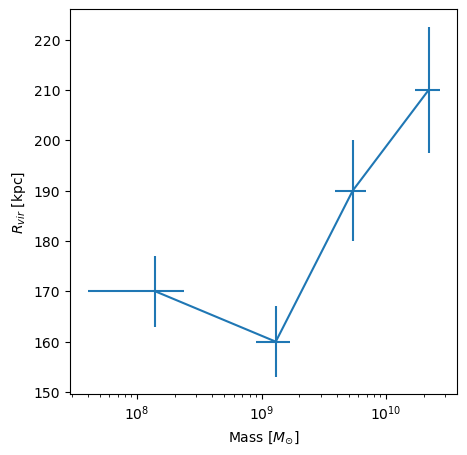

In [24]:
plt.style.use('default')

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()

M = array([1.4e8,1.3e9,5.4e9,2.2e10]) 
M_err = array([0.2e9,0.8e9,3e9,1e10])/2
R = array([170.0,160.0,190,210])
R_err = array([14,14,20,25])/2

plt.errorbar(M,R,yerr=R_err,xerr=M_err)

plt.xlabel('Mass [$M_{\odot}$]')
plt.ylabel('$R_{vir}$ [kpc]')
plt.xscale('log')

plt.savefig('../plots/BoringPlot3_Bad.pdf',transparent=False,bbox_inches='tight')

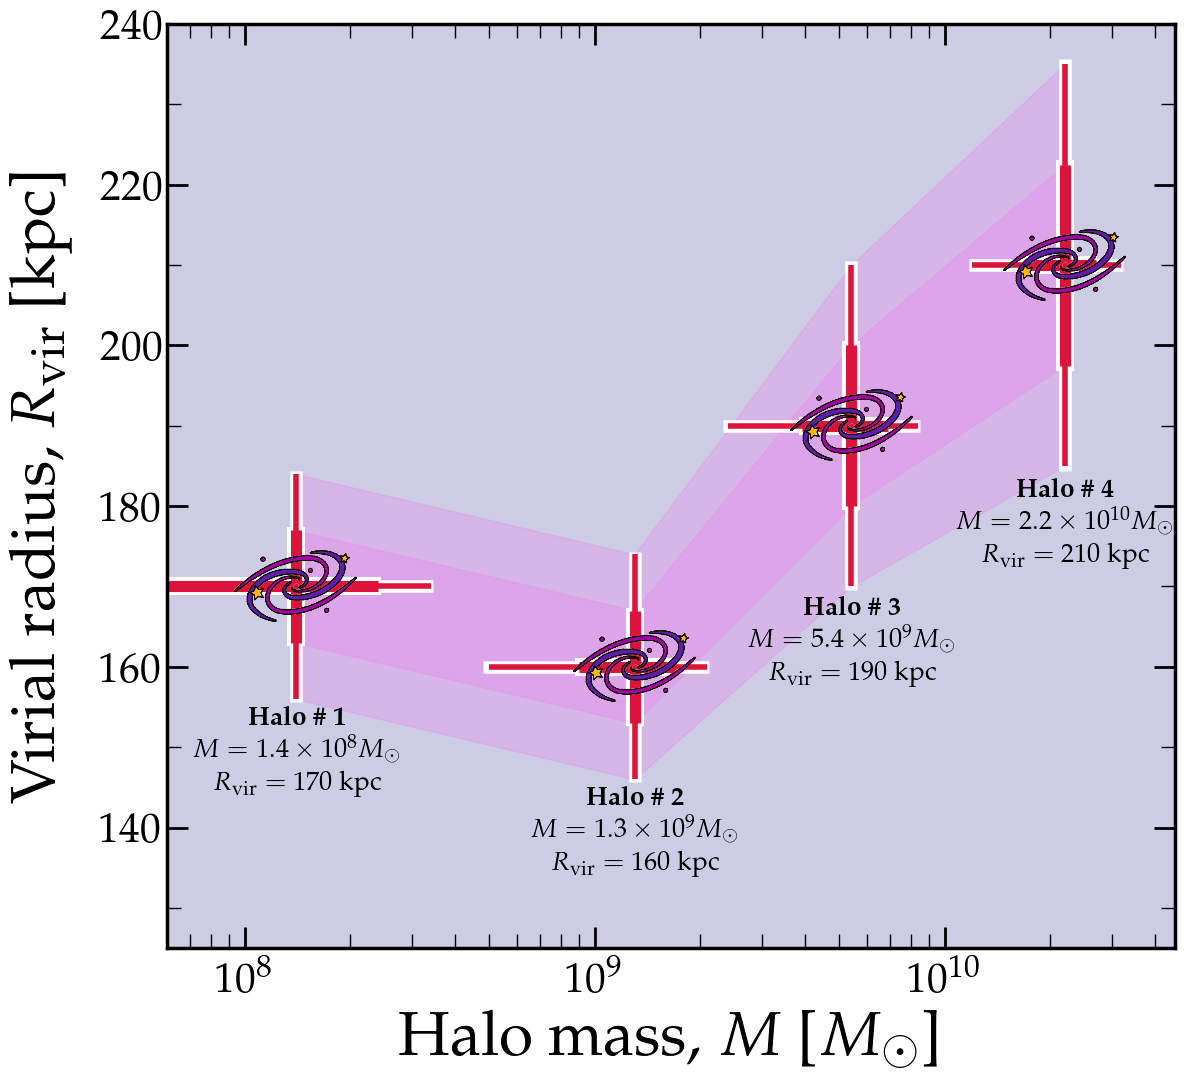

In [25]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Make function to plot (x,y) points using a provided image (e.g png file)
def PointsAsImages(ax,x, y, file, zoom=1):
    image = plt.imread(file)
    im = OffsetImage(image, zoom=zoom)
    x, y = atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))

plt.style.use('sty.mplstyle')

fig, ax = plt.subplots()

PointsAsImages(ax,M, R, 'images/galaxy.png', zoom=0.3)
ax.errorbar(M, R,xerr=2.05*M_err,yerr=2.05*R_err,fmt='.',elinewidth=4+5,color='w')
ax.errorbar(M, R,xerr=1.05*M_err,yerr=1.05*R_err,fmt='.',elinewidth=8+5,color='w')
ax.errorbar(M, R,xerr=2*M_err,yerr=2*R_err,fmt='.',elinewidth=4,color='crimson')
ax.errorbar(M, R,xerr=M_err,yerr=R_err,fmt='.',elinewidth=8,color='crimson')

ax.fill_between(M, R+R_err,y2=R-R_err,color='violet',alpha=0.3)
ax.fill_between(M, R+2*R_err,y2=R-2*R_err,color='violet',alpha=0.3)

for i,m,r,dr in zip(range(4),M,R,R_err):
    Mord = floor(log10(m))
    Mdec = m/10**Mord  
    plt.text(m,r-dr*2.1,r'\begin{center} {\bf Halo \# %.1d} \linebreak $M =  %.1f \times 10^{%.0f} M_\odot$ \linebreak $R_{\rm vir} = $ %.0f kpc \end{center}'%(i+1,Mdec,Mord,r),fontsize=19,ha='center',va='top')

plt.xlabel(r'Halo mass, $M$ [$M_{\odot}$]')
plt.ylabel(r'Virial radius, $R_{\rm vir}$ [kpc]',labelpad=20)

plt.xscale('log')
plt.ylim([125,240])
plt.xlim(left=0.6e8)

ax.patch.set_facecolor('navy')
ax.patch.set_alpha(0.2)

from matplotlib.ticker import MultipleLocator
ax.yaxis.set_minor_locator(MultipleLocator(10))

ax.tick_params(axis='x', which='major', pad=10)

ax.set_zorder(100)
plt.savefig('../plots/BoringPlot3_Good.pdf',transparent=False,bbox_inches='tight',dpi=200)
plt.savefig('../plots/plots_png/BoringPlot3_Good.png',transparent=False,bbox_inches='tight',dpi=200)
